In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:

# Charger le dataset
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\fpl\FPL_tweets.csv")

# Garder uniquement les 3000 premières lignes
data = data.head(3000)

# Vérifier les données restantes
print(data.info())

# Sauvegarder le dataset réduit 
data.to_csv(r"C:\Users\Lenovo\Desktop\fpl\FPL_tweets_reduced.csv", index=False)

print("Dataset réduit à 3000 tweets et sauvegardé.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   float64
 1   Timestamp         3000 non-null   object 
 2   User              3000 non-null   object 
 3   Text              3000 non-null   object 
 4   Hashtag           511 non-null    object 
 5   Retweets          3000 non-null   int64  
 6   Likes             3000 non-null   int64  
 7   Replies           3000 non-null   int64  
 8   Source            3000 non-null   object 
 9   Location          2256 non-null   object 
 10  Verified_Account  3000 non-null   bool   
 11  Followers         3000 non-null   int64  
 12  Following         3000 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 284.3+ KB
None
Dataset réduit à 3000 tweets et sauvegardé.


In [27]:
data.head(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453


In [29]:
print(data.columns)


Index(['ID', 'Timestamp', 'User', 'Text', 'Hashtag', 'Retweets', 'Likes',
       'Replies', 'Source', 'Location', 'Verified_Account', 'Followers',
       'Following'],
      dtype='object')


In [30]:
# Supprimer les tweets ayant le même texte dans la colonne 'Text'
data = data.drop_duplicates(subset='Text')

# Vérifier le nombre de tweets après suppression
print(f"Nombre de tweets après suppression des doublons : {data.shape[0]}")

# Sauvegarder le dataset nettoyé dans un fichier CSV
data.to_csv(r"C:\Users\Lenovo\Desktop\fpl\FPL_tweets_unique.csv", index=False)

print("Les tweets en double ont été supprimés et le dataset a été sauvegardé.")


Nombre de tweets après suppression des doublons : 2982
Les tweets en double ont été supprimés et le dataset a été sauvegardé.


In [31]:
# Importing HTMLParser
import html
from html.parser import HTMLParser
html_parser = HTMLParser()


In [87]:
data['clean_tweet'] = data['Text'].apply(lambda x: html.unescape(x))

data.head(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812,I scored 75 points in Gameweek 20 on Fantasy P...,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr...",score 75 point gameweek 20 fantasi premier lea...,scored 75 point gameweek 20 fantasy premier le...,15
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351,"110,525 have transferred Walcott into fantasy ...","[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem...",110 525 transfer walcott fantasi premier leagu...,110 525 transferred walcott fantasy premier le...,18
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64,I scored 61 points in Gameweek 20 on Fantasy P...,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr...",score 61 point gameweek 20 fantasi premier lea...,scored 61 point gameweek 20 fantasy premier le...,15
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100,I scored 71 points in Gameweek 20 on Fantasy P...,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr...",score 71 point gameweek 20 fantasi premier lea...,scored 71 point gameweek 20 fantasy premier le...,15
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453,My life's ambition is to one week be the highe...,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ...",life ambit one week highest scorer fantasi pre...,life ambition one week highest scorer fantasy ...,17


In [34]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [88]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r"[^a-zA-Z0-9']",' ',x))
data.head(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812,I scored 75 points in Gameweek 20 on Fantasy P...,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr...",score 75 point gameweek 20 fantasi premier lea...,scored 75 point gameweek 20 fantasy premier le...,15
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351,110 525 have transferred Walcott into fantasy ...,"[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem...",110 525 transfer walcott fantasi premier leagu...,110 525 transferred walcott fantasy premier le...,18
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64,I scored 61 points in Gameweek 20 on Fantasy P...,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr...",score 61 point gameweek 20 fantasi premier lea...,scored 61 point gameweek 20 fantasy premier le...,15
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100,I scored 71 points in Gameweek 20 on Fantasy P...,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr...",score 71 point gameweek 20 fantasi premier lea...,scored 71 point gameweek 20 fantasy premier le...,15
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453,My life's ambition is to one week be the highe...,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ...",life ambit one week highest scorer fantasi pre...,life ambition one week highest scorer fantasy ...,17


In [89]:
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], r"[^\w\s]")
data.head(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812,I scored 75 points in Gameweek 20 on Fantasy P...,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr...",score 75 point gameweek 20 fantasi premier lea...,scored 75 point gameweek 20 fantasy premier le...,15
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351,110 525 have transferred Walcott into fantasy ...,"[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem...",110 525 transfer walcott fantasi premier leagu...,110 525 transferred walcott fantasy premier le...,18
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64,I scored 61 points in Gameweek 20 on Fantasy P...,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr...",score 61 point gameweek 20 fantasi premier lea...,scored 61 point gameweek 20 fantasy premier le...,15
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100,I scored 71 points in Gameweek 20 on Fantasy P...,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr...",score 71 point gameweek 20 fantasi premier lea...,scored 71 point gameweek 20 fantasy premier le...,15
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453,My lifes ambition is to one week be the highes...,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ...",life ambit one week highest scorer fantasi pre...,life ambition one week highest scorer fantasy ...,17


In [90]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())
data.head(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812,i scored 75 points in gameweek 20 on fantasy p...,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr...",score 75 point gameweek 20 fantasi premier lea...,scored 75 point gameweek 20 fantasy premier le...,15
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351,110 525 have transferred walcott into fantasy ...,"[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem...",110 525 transfer walcott fantasi premier leagu...,110 525 transferred walcott fantasy premier le...,18
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64,i scored 61 points in gameweek 20 on fantasy p...,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr...",score 61 point gameweek 20 fantasi premier lea...,scored 61 point gameweek 20 fantasy premier le...,15
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100,i scored 71 points in gameweek 20 on fantasy p...,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr...",score 71 point gameweek 20 fantasi premier lea...,scored 71 point gameweek 20 fantasy premier le...,15
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453,my lifes ambition is to one week be the highes...,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ...",life ambit one week highest scorer fantasi pre...,life ambition one week highest scorer fantasy ...,17


In [40]:
data['clean_tweet'][1]

'110 525 have transferred walcott into fantasy premier league  shows how far one good game can get you   '

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
# Creating token for the clean tweets
data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
data.head(5)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812,i scored 75 points in gameweek 20 on fantasy p...,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr...",score 75 point gameweek 20 fantasi premier lea...,scored 75 point gameweek 20 fantasy premier le...,15
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351,110 525 have transferred walcott into fantasy ...,"[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem...",110 525 transfer walcott fantasi premier leagu...,110 525 transferred walcott fantasy premier le...,18
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64,i scored 61 points in gameweek 20 on fantasy p...,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr...",score 61 point gameweek 20 fantasi premier lea...,scored 61 point gameweek 20 fantasy premier le...,15
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100,i scored 71 points in gameweek 20 on fantasy p...,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr...",score 71 point gameweek 20 fantasi premier lea...,scored 71 point gameweek 20 fantasy premier le...,15
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453,my lifes ambition is to one week be the highes...,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ...",life ambit one week highest scorer fantasi pre...,life ambition one week highest scorer fantasy ...,17


In [43]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
data[['tweet_token', 'tweet_token_filtered']].head(5)

,tweet_token,tweet_token_filtered
0,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr..."
1,"[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem..."
2,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr..."
3,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr..."
4,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ..."


In [46]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [93]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
data['tweet_stemmed'].head(5)

0    score 75 point gameweek 20 fantasi premier lea...
1    110 525 transfer walcott fantasi premier leagu...
2    score 61 point gameweek 20 fantasi premier lea...
3    score 71 point gameweek 20 fantasi premier lea...
4    life ambit one week highest scorer fantasi pre...
Name: tweet_stemmed, dtype: object

In [48]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [94]:
data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(5)

0    scored 75 point gameweek 20 fantasy premier le...
1    110 525 transferred walcott fantasy premier le...
2    scored 61 point gameweek 20 fantasy premier le...
3    scored 71 point gameweek 20 fantasy premier le...
4    life ambition one week highest scorer fantasy ...
Name: tweet_lemmatized, dtype: object

In [51]:
df_copy = data
def count_elements(vector): 
    return pd.Series([len(vector)])

In [52]:
df_copy['num_elementos'] = df_copy['tweet_token'].apply(count_elements)

df_copy

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,2.855350e+17,2012-12-30 23:56:11+00:00,AmythLFC,I scored 75 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,559,812,i scored 75 points in gameweek 20 on fantasy p...,"[i, scored, 75, points, in, gameweek, 20, on, ...","[scored, 75, points, gameweek, 20, fantasy, pr...",score 75 point gameweek 20 fantasi premier lea...,scored 75 point gameweek 20 fantasy premier le...,15
1,2.855290e+17,2012-12-30 23:31:55+00:00,BenBoutwood,"110,525 have transferred Walcott into fantasy ...",NaN,0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,False,267,351,110 525 have transferred walcott into fantasy ...,"[110, 525, have, transferred, walcott, into, f...","[110, 525, transferred, walcott, fantasy, prem...",110 525 transfer walcott fantasi premier leagu...,110 525 transferred walcott fantasy premier le...,18
2,2.855270e+17,2012-12-30 23:24:56+00:00,ddreid88,I scored 61 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""http://twitter.com/download/android"" ...",Essex,False,7,64,i scored 61 points in gameweek 20 on fantasy p...,"[i, scored, 61, points, in, gameweek, 20, on, ...","[scored, 61, points, gameweek, 20, fantasy, pr...",score 61 point gameweek 20 fantasi premier lea...,scored 61 point gameweek 20 fantasy premier le...,15
3,2.855270e+17,2012-12-30 23:23:26+00:00,ahmedkungora16,I scored 71 points in Gameweek 20 on Fantasy P...,NaN,0,0,0,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",NaN,False,132,1100,i scored 71 points in gameweek 20 on fantasy p...,"[i, scored, 71, points, in, gameweek, 20, on, ...","[scored, 71, points, gameweek, 20, fantasy, pr...",score 71 point gameweek 20 fantasi premier lea...,scored 71 point gameweek 20 fantasy premier le...,15
4,2.855260e+17,2012-12-30 23:20:13+00:00,murray_rankin,My life's ambition is to one week be the highe...,"['fpl', 'aiminghigh']",0,0,0,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","Glasgow, Scotland",False,133,453,my lifes ambition is to one week be the highes...,"[my, lifes, ambition, is, to, one, week, be, t...","[lifes, ambition, one, week, highest, scorer, ...",life ambit one week highest scorer fantasi pre...,life ambition one week highest scorer fantasy ...,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2.795500e+17,2012-12-14 11:33:01+00:00,Haido___,RT @premierleague: Calling all Fantasy Premier...,NaN,0,0,0,"<a href=""http://ubersocial.com"" rel=""nofollow""...","Zamfara, Nigeria",False,5715,2984,rt premierleague calling all fantasy premier...,"[rt, premierleague, calling, all, fantasy, pre...","[rt, premierleague, calling, fantasy, premier,...",rt premierleagu call fantasi premier leagu man...,rt premierleague calling fantasy premier leagu...,20
2996,2.795490e+17,2012-12-14 11:32:40+00:00,lia7christine,@OfficialLFC_ID @KrisPeterson7 playing Fantasy...,NaN,0,0,0,"<a href=""http://ubersocial.com"" rel=""nofollow""...","Jakarta, Indonesia",False,1157,638,officiallfc id krispeterson7 playing fantasy...,"[officiallfc, id, krispeterson7, playing, fant...","[officiallfc, id, krispeterson7, playing, fant...",officiallfc id krispeterson7 play fantasi prem...,officiallfc id krispeterson7 playing fantasy p...,7
2997,2.795490e+17,2012-12-14 11:29:58+00:00,premierleague,Calling all Fantasy Premier League managers: y...,['FPL'],39,7,6,"<a href=""http://www.conversocial.com"" rel=""nof...",NaN,False,40007491,83,calling all fantasy premier league managers y...,"[calling, all, fantasy, premier, league, manag...","[calling, fantasy, premier, league, managers, ...",call fantasi premier leagu manag youv got exac...,calling fantasy premier league manager youve g...,24
2998,2.795480e+17,2012-12-14 11:28:04+00:00,novemba23rd,"Messi, Reus and Ozil: This week's E

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
count_vectorizer = CountVectorizer()
dtm = count_vectorizer.fit_transform(data['tweet_stemmed'])

In [55]:
total_words = dtm.sum()
total_words

37894

In [56]:
count_vectorizer = CountVectorizer()
dtm = count_vectorizer.fit_transform(data['tweet_lemmatized'])
total_words = dtm.sum()
total_words

37765

In [57]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data['tweet_lemmatized'])
total_words = tfidf.sum()
total_words

8758.35807637151

In [58]:
num_rows = data.tweet_lemmatized.shape[0]


subset_size = int(num_rows * 0.1)

np.random.seed(42)

random_indices = np.random.choice(num_rows, subset_size, replace=False)

subset_df = data.tweet_lemmatized.iloc[random_indices]

subset_df 


2424    thanks carzola hat trick 1 assist saved fantas...
1555    jossled 74 point gameweek 18 fantasy premier l...
886     yang belum tau fantasy premier league minta pe...
331     expensive player fantasy premier league benche...
2237    anthonywalsh26 bad fantasy premier league week...
                              ...                        
298     ini fantasy premier league hancur semua pemain...
1616    blinder premier league fantasy football le cha...
239     walcott ahora mismo entras mi equipo del fanta...
535     tip d fantasy premier league pekan ke 20 http ...
695     http co cfcl3yrk robin van persie gareth bale ...
Name: tweet_lemmatized, Length: 298, dtype: object

In [59]:
from sklearn.cluster import KMeans
X = tfidf_vectorizer.fit_transform(subset_df)
max_clusters = 20 
scores = [] 

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


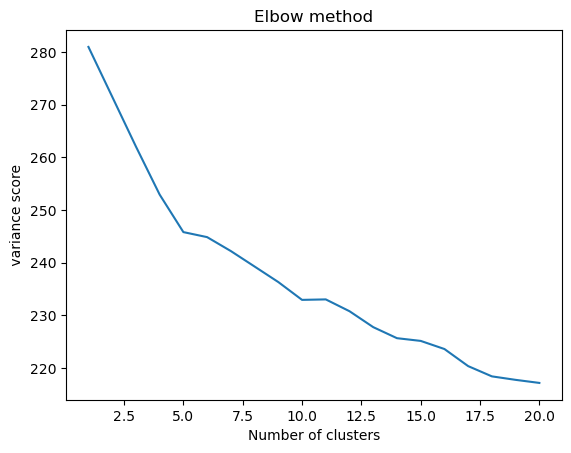

In [60]:
# Elbow method 
import matplotlib.pyplot as plt
plt.plot(range(1, max_clusters + 1), scores)
plt.xlabel('Number of clusters')
plt.ylabel(' variance score ')
plt.title('Elbow method')
plt.show()

In [61]:
kmeansmodel = KMeans(n_clusters=7,init='k-means++', random_state = 42)
y_kmeans= kmeansmodel.fit_predict(X)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
kmeansmodel

KMeans(n_clusters=7, random_state=42)

In [63]:
# Checking common words

freqX = pd.Series(' '.join(data['tweet_lemmatized']).split()).value_counts()[:25]

print('FREQ X: \n',freqX)

FREQ X: 
 league      3025
fantasy     2980
premier     2944
http        1601
co          1600
point        910
gameweek     874
scored       725
team         540
football     502
week         496
20           353
18           338
rt           293
17           281
tip          243
cazorla      214
ba           198
fpl          197
mata         196
santi        195
19           189
walcott      188
bale         185
demba        181
Name: count, dtype: int64


In [64]:
rareX = pd.Series(' '.join(data['tweet_lemmatized']).split()).value_counts()[-100:]
print('RARE X: \n',rareX)

RARE X: 
 carrick         1
shii            1
sense           1
count           1
6s2ppfc8        1
               ..
guaru2rp        1
pattinsonboy    1
bullshit        1
sod             1
makasih         1
Name: count, Length: 100, dtype: int64


In [71]:
vectorizer = CountVectorizer(stop_words='english', binary=True)  # Binary to treat as set-like presence
binary_features = vectorizer.fit_transform(data.tweet_lemmatized)

In [72]:
dense_matrix = binary_features.toarray()

# Compute pairwise Jaccard distances
from sklearn.metrics import pairwise_distances
jaccard_distance_matrix = pairwise_distances(dense_matrix, metric='jaccard')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [73]:
kmeans=KMeans(n_clusters=7, random_state=42)
kmeans.fit(jaccard_distance_matrix)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7, random_state=42)

In [75]:
tweets = data['Text'].tolist()
tweets

['I scored 75 points in Gameweek 20 on Fantasy Premier League http://t.co/CxBnWGk6',
 '110,525 have transferred Walcott into fantasy premier league. Shows how far one good game can get you...',
 'I scored 61 points in Gameweek 20 on Fantasy Premier League http://t.co/4ys8YkcE',
 'I scored 71 points in Gameweek 20 on Fantasy Premier League http://t.co/6XBH1fVh',
 "My life's ambition is to one week be the highest scorer on Fantasy Premier League. #fpl #aiminghigh",
 '@rossdeadmanz no he dint tell me u seen fantasy premier league?',
 '@fantasy_premier kok saya udh daftar FPL tapi pas log in nya nga bisa2 sih?',
 '@tstrachanedit WOOO. Above you in the Fantasy Premier League by 1 point. #WINNAR!',
 'beda tipis sama si kribo RT @aditawey @monoponic I scored 44 points in Gameweek 20 on Fantasy Premier League http://t.co/uk8fRsRV',
 'I scored 74 points in Gameweek 20 on Fantasy Premier League http://t.co/IHB7ROVC',
 'I scored 57 points in Gameweek 20 on Fantasy Premier League http://t.co/mvgjr

In [76]:
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Asignar etiquetas de cluster a cada tweet
cluster_labels = kmeans.labels_

cluster_labels

array([0, 1, 0, ..., 1, 1, 1])

In [77]:

results = pd.DataFrame({'tweet': tweets,'cluster': cluster_labels})
for cluster in range(7):
    print(f"Cluster {cluster}:")
    cluster_users = results[results['cluster'] == cluster]
    print(cluster_users)

Cluster 0:
                                                  tweet  cluster
0     I scored 75 points in Gameweek 20 on Fantasy P...        0
2     I scored 61 points in Gameweek 20 on Fantasy P...        0
3     I scored 71 points in Gameweek 20 on Fantasy P...        0
9     I scored 74 points in Gameweek 20 on Fantasy P...        0
10    I scored 57 points in Gameweek 20 on Fantasy P...        0
...                                                 ...      ...
2919  I scored 72 points in Gameweek 16 on Fantasy P...        0
2922  Fantasy Premier League: Gameweek 17 Tips http:...        0
2926  I scored 90 points in Gameweek 16 on Fantasy P...        0
2928  I scored 66 points in Gameweek 16 on Fantasy P...        0
2939  I scored 77 points in Gameweek 16 on Fantasy P...        0

[721 rows x 2 columns]
Cluster 1:
                                                  tweet  cluster
1     110,525 have transferred Walcott into fantasy ...        1
4     My life's ambition is to one week be t

<Axes: xlabel='cluster', ylabel='count'>

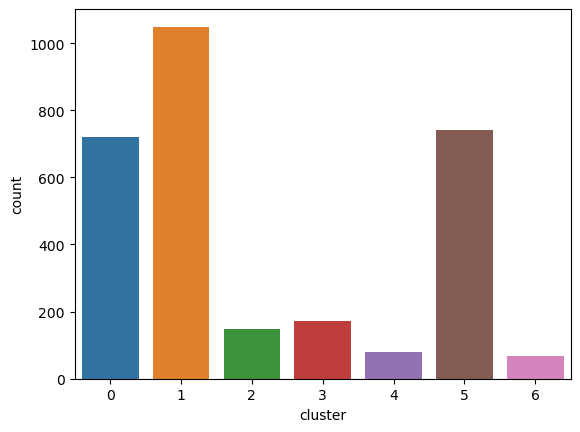

In [78]:
import seaborn as sns 
sns.countplot(data =results, x = 'cluster')

In [79]:
from sklearn.metrics import euclidean_distances

vectorized_tweets =jaccard_distance_matrix
# Choose representative tweets based on proximity to centroid
representative_tweets = []

for cluster in range(7):  # Assuming 7 clusters
    print(f"Cluster {cluster}:")
    
    # Get the indices of the tweets in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Get the vectors of the tweets in this cluster
    cluster_vectors = vectorized_tweets[cluster_indices]
    
    # Get the centroid of the current cluster
    centroid = centroids[cluster]
    
    # Calculate distances from each tweet to the centroid
    distances = euclidean_distances(cluster_vectors, centroid.reshape(1, -1))
    
    # Find the tweet with the minimum distance to the centroid
    closest_tweet_index = cluster_indices[np.argmin(distances)]
    
    # Get the tweet text from the closest tweet
    representative_tweet = tweets[closest_tweet_index]
    
    print(f"Representative Tweet: {representative_tweet}")
    representative_tweets.append(representative_tweet)

Cluster 0:
Representative Tweet: I scored 84 points in Gameweek 15 on Fantasy Premier League http://t.co/xiU1RFU2
Cluster 1:
Representative Tweet: @Hobbersten Tenker du på Fantasy Premier League? I så fall tror jeg svaret er ja.
Cluster 2:
Representative Tweet: Robin van Persie, Gareth Bale and Theo Walcott - This week's Premier League fantasy football team http://t.co/Umkb7SpV Via @Geands
Cluster 3:
Representative Tweet: Demba Ba, Santi Cazorla and Juan Mata - This week's Premier League fantasy football team http://t.co/4J1tsK0O #FT9
Cluster 4:
Representative Tweet: @FPL_Guru_ @_fantasypremier worked about as well as Stephen Gatelys holiday to Majorca...
Cluster 5:
Representative Tweet: fantasy premier league asyik down jerk.. puii..!
Cluster 6:
Representative Tweet: Tips DS: Fantasy Premier League Pekan Ke-20: 20 tim siap bertanding dan kami telah menyiapkan beberapa tips ring... http://t.co/IL3k8qfm


In [80]:
from fcmeans import FCM 

In [81]:
vectorizer = TfidfVectorizer()  # Binary to treat as set-like presence
binary_features = vectorizer.fit_transform(data.tweet_lemmatized)
dense_matrix = binary_features.toarray()

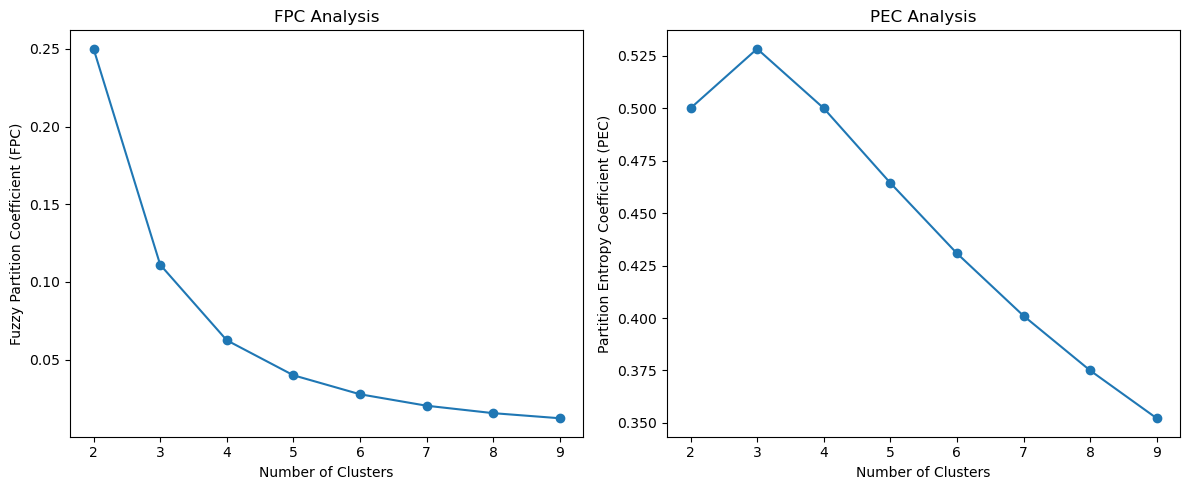

In [83]:
FPC = []
PEC = []

# Iterate over a range of clusters
for n_clusters in range(2, 10):
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(dense_matrix)  # Replace `data` with your dataset
    
    FPC.append(fcm.partition_coefficient)  # Use FPC
    PEC.append(fcm.partition_entropy_coefficient)  # Use PEC

# Plot the FPC and PEC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), FPC, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('FPC Analysis')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), PEC, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Partition Entropy Coefficient (PEC)')
plt.title('PEC Analysis')

plt.tight_layout()
plt.show()

In [86]:
# Step 2: Apply Fuzzy C-Means clustering
fcm = FCM(n_clusters=4, m=2)  # m=2 is a common choice for the fuzziness factor
fcm.fit(dense_matrix)

# Get the degree of membership (membership matrix)
membership = fcm.u

# Step 3: Assign each tweet to a cluster
cluster_labels = np.argmax(membership, axis=1)

# Step 4: Choose representative tweets based on maximum membership
representative_tweets = []

for cluster in range(4):  # Assuming 4 clusters, adjust if necessary
    # Get the indices of tweets in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Get the membership values for the cluster
    cluster_membership = membership[cluster_indices, cluster]
    
    # Find the tweet with the highest membership to the cluster
    closest_tweet_index = cluster_indices[np.argmax(cluster_membership)]
    
    # Get the tweet text from the closest tweet
    representative_tweet = tweets[closest_tweet_index]
    
    print(f"Cluster {cluster}:")
    print(f"Representative Tweet: {representative_tweet}")
    representative_tweets.append(representative_tweet)

Cluster 0:
Representative Tweet: Keep An Eye On The Transfer Rumours, Van Persie And Bale Are a Must – Fantasy Premier League Gameweek 20 Preview http://t.co/3nc78E2G
Cluster 1:
Representative Tweet: Demba Ba, Santi Cazorla and Juan Mata - This week's Premier League fantasy football team
Cluster 2:
Representative Tweet: #FootBall Tips DS: Fantasy Premier League Pekan Ke-20: 20 tim siap bertanding dan kami telah menyiapkan b... http://t.co/L54MB68q #Hebat
Cluster 3:
Representative Tweet: I scored 18 points in Gameweek 17 on Fantasy Premier League http://t.co/BXFzSyfZ


In [98]:
# Étape 1 : Installer le module watermark
# Exécutez cette cellule pour installer watermark si ce n'est pas encore fait.
!pip install watermark

# Étape 2 : Charger l'extension watermark
try:
    %load_ext watermark
    print("Module 'watermark' chargé avec succès !")
except ModuleNotFoundError:
    print("Erreur : le module 'watermark' n'a pas pu être chargé. Assurez-vous qu'il est bien installé.")

# Étape 3 : Utiliser le module watermark
# Afficher les informations sur Python, Numpy, Pandas, et Scikit-learn
print("\n--- Informations sur les bibliothèques ---")
%watermark -v -p numpy,pandas,scikit-learn

# Afficher la date, l'heure et le fuseau horaire
print("\n--- Informations sur le système ---")
%watermark -u -n -t -z

# Afficher toutes les bibliothèques Python chargées dans l'environnement
print("\n--- Liste des bibliothèques chargées ---")
%watermark -iv


  %reload_ext watermark
Module 'watermark' chargé avec succès !

--- Informations sur les bibliothèques ---

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

numpy       : 1.24.3
pandas      : 2.0.3
scikit-learn: 1.3.0


--- Informations sur le système ---
Last updated: Sun Nov 24 2024 00:07:12Maroc (heure d’été)


--- Liste des bibliothèques chargées ---
fcmeans   : 1.7.2
re        : 2.2.1
sklearn   : 1.3.0
seaborn   : 0.12.2
pandas    : 2.0.3
numpy     : 1.24.3
matplotlib: 3.7.2
nltk      : 3.8.1

